# Trucs à faire :
## Observation Etape 7 
j'ai l'impression que ca change rien de mettre du flou gaussien mais si il le demande c'est que c'est potentiellement utile donc chercher comment
## faire Etape 8 
## faire etape 10

#### **Groupe** : D1a
#### **Nom_1** : COPPENS Augustin 
#### **Nom_2** : LACOSTE Antony

# Titre 1

## Titre 2
Texte de presentation du rapport avec un **exemple de texte en gras**
- Item 1
- Item 2

### Enoncé
je te conseil de mettre l'énoncé de chaque question

### Commentaire
et apres tu mets tes commentaires sur ce que tu as faits et les trucs qui ont bloqué pour la question 

*Apres tu mets ton code dans une cellule de code*
*Je te conseil d'ailleur de faire 2 cellules de code : une pour la fonction et un autre pour le test (dans ton cas juste l'execution de la fonction)*

# INF TC1 - TD5 Devoir sur la Quantification des Couleurs

## Introduction
Ce notebook présente le processus de quantification des couleurs d'une image. L'objectif est de réduire le nombre de couleurs tout en préservant une représentation fidèle de l'image originale.

## Configuration et Importation des Bibliothèques


In [1]:
from PIL import Image
from IPython.display import display
from copy import deepcopy
from skimage.color import rgb2lab, deltaE_ciede2000
from matplotlib.colors import ListedColormap
from math import sqrt

import numpy as np
import random
import matplotlib.pyplot as plt

## Étape 1

### 1.1 : Énoncé
Prendre en main une image de votre choix (pas trop grande) en la chargeant avec PIL. Lister les couleurs présentes, identifier celles qui sont uniques et leur fréquence. Vous pouvez pour cela utiliser [Matplotlib](https://matplotlib.org/stable/gallery/index.html)..
### 1.2 : Choix de l'image
Le dictionnaire chemin permet de changer rapidement l'image d'interet : 
<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="IMG_3135.png" alt="1" style="width:3cm;">
          <p>1</p>
        </td>
        <td>
          <img src="IMG_1964.png" alt="2" style="width:3cm;">
          <p>2</p>
        </td>
        <td>
          <img src="IMG_0742.jpg" alt="3" style="width:3cm;">
          <p>3</p>
        </td>
        <td>
          <img src="figures/color-rainbow.png" alt="RB" style="width:3cm;">
          <p>RB</p>
        </td>
        <td>
          <img src="figures/4-color.png" alt="4col" style="width:3cm;">
          <p>4col</p>
        </td>
      </tr>
    </table>
  </div>

Image de dimenssion 200x267


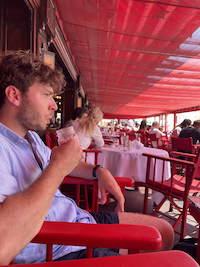

In [2]:
chemin = {'1' : "IMG_3135.png",'2' : "IMG_1964.png",'3' : 'IMG_0742.jpg','RB' : "figures/color-rainbow.png", '4col' : "figures/4-color.png"}

choix = '2'

im = Image.open(str(chemin[choix]))
im = im.convert("RGB")  # important pour bien avoir 3 couleurs
px = im.load()
w , h = im.size

print(f'Image de dimenssion {w}x{h}')
display(im)

### 1.3 : Listing des couleurs
La fonction **dict_couleur** prend en argument : 
- **px** : l'image décomposée en pixels
- **w** et **h** : les dimensions de l'image

La fonction renvoie un dictionnaire dont les **clés** sont les **couleurs de l'image** et les **objets** leur **frequence d'apparition** dans cette dernière.

In [3]:
def dict_couleur(px , w , h) :
    dict_c = {}
    for x in range (w) : 
        for y in range (h) : #On parcourt tout les pixels de la photo
            if px[x,y] in  dict_c: #On test si la couleur du pixel est deja presente dans le dictionnaire
                dict_c[px[x,y]] += 1 #Si oui, on incremente de 1 la valeur de sa frequence
            else :
                dict_c[px[x,y]] = 1  #Si la couleur n'etait pas presente, on l'ajoute dans le dictionnaire avec une frequence de 1
    return dict_c

In [4]:
im_dict_couleurs = dict_couleur(px, w, h)

### 1.4 : Affichage des couleurs
On peut ensuite afficher les differentes couleurs sous forme d'histogramme 

(*Attention, l'affichage dans l'histogramme peut être très long*)

In [5]:
def plot_color_histogram(color_dict):
    # Extraire les couleurs et leurs fréquences
    colors = list(color_dict.keys())
    frequencies = list(color_dict.values())

    # Créer un histogramme où chaque barre a la couleur correspondante
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(color_dict)), frequencies, color=[(r/255, g/255, b/255) for r, g, b in colors])

    # Configurer le graphique
    plt.xlabel('Couleurs')
    plt.ylabel('Fréquence')
    plt.title('Histogramme des fréquences des couleurs')
    plt.xticks(range(len(color_dict)), [''] * len(color_dict))  # Pas de labels sur l'axe x

    plt.show()

(*Attention, l'affichage dans l'histogramme peut être très long*)

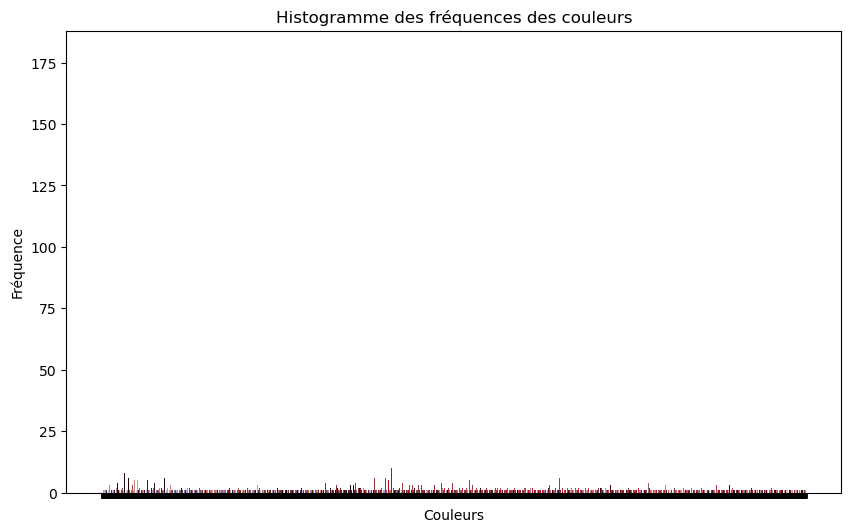

In [6]:
plot_color_histogram(im_dict_couleurs)

#### 1.4.1 : Test avec les 4 couleurs

Un test simple consiste à appliquer les fonctions précedentes à une image consituée de seulement 4 couleurs, on s'attend donc à obtenir un histogramme constitué de seulement 4 couleurs ayant la même frequence.

<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/4-color.png" alt="Image initale" style="width:3cm;">
          <p>Image initale</p>
        </td>
         <td>
          <img src="figures/histo_4col.png" alt="Résultat attendu" style="width:5cm;">
          <p>Résultat attendu</p>
        </td>
      </tr>
    </table>
  </div>

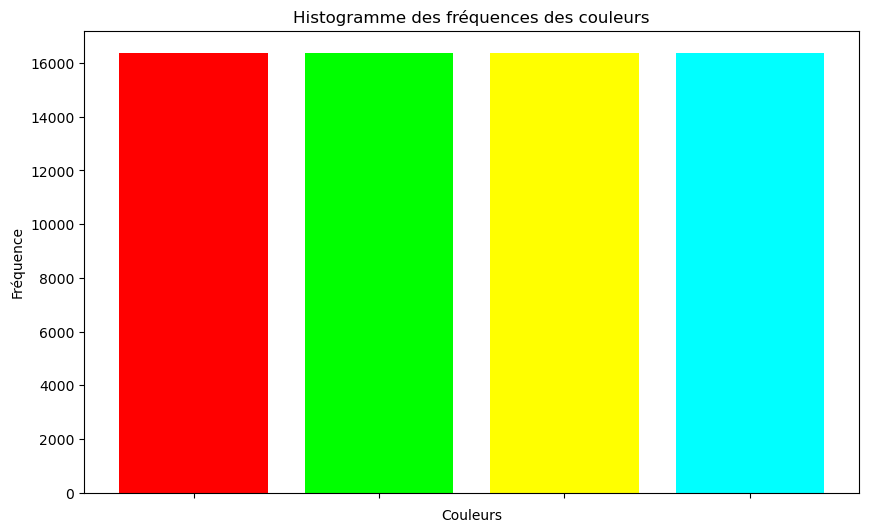

In [7]:
im_4col = Image.open('figures/4-color.png') #On charge l'image sans modifier celle utilisée pour le reste du programme
im_4col = im_4col.convert("RGB")  
px_4col = im_4col.load()
w_4col , h_4col = im_4col.size

im_4col_dict_couleurs = dict_couleur(px_4col, w_4col, h_4col)
plot_color_histogram(im_4col_dict_couleurs)

## Étape 2 <a id="etape2"></a>
### 2.0 : Énoncé
Proposer une méthode (naïve pour commencer) de choix d'une palette de $k$ couleurs. Affichez là sous forme d'image (exemple de d'image au milieu de la figure du dessus) avec une nouvelle image PIL. Utilisez également des images simples où le résultat attendu est connu comme mour les images ci-dessous :
  <div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/1-color-back.png" alt="1 couleur noir" style="width:3cm;">
          <p>1 couleur noir</p>
        </td>
        <td>
          <img src="figures/4-color.png" alt="4 couleurs" style="width:3cm;">
          <p>4 couleurs</p>
        </td>
      </tr>
    </table>
  </div>
  
### 2.1 : Méthode naïve
Pour la **méthode naïve**, nous choisissons simplement les ***k*** couleurs les plus frequentes en parcourant les couleurs du dictionnaire ***dict_couleurs*** 

Il faut faire attention à ce que le nombre de couleurs demandées ***k*** ne depasse pas le nombre de couleur enregistrées dans le dictionnaire ***dict_couleurs***. Dans ce cas, nous avons décidé de prevenir l'utilisateur que le dictonnaire ne contenait pas suffisament de couleur, et nous retournons les couleurs du dictionnaire (c'est à dire, l'ensemble de ses clés)

(*Cette méthode sera ameliorée pour reduire sa complexitée (cf Étape 9)*)


In [8]:
def palette_naive(dict_couleurs , k):
    n_couleur = len(dict_couleurs)
    if k > n_couleur:
        k = n_couleur
        print(f'Attention : le dictionnaire contient seulement {n_couleur}')
        return dict_couleurs.keys()
    pal = []  # Initialiser une liste vide pour stocker la palette de couleurs

    for i in range(k):  
        max = 0  # Initialiser 'max', fréquence la plus élevée trouvée
        key_max = (0, 0, 0)  # Initialiser 'key_max' pour stocker la couleur avec la fréquence la plus élevée

        for key in dict_couleurs:  # Parcourir toutes les couleurs (clés) dans le dictionnaire pour trouver la plus fréquente
            if dict_couleurs[key] > max:  # Si la fréquence actuelle de la couleur est supérieure au 'max' courant
                max = dict_couleurs[key]  
                key_max = key  

        pal.append(key_max)  # Ajouter la couleur sélectionnée à la palette 'pal'
        dict_couleurs[key_max] = -1  # Mettre sa fréquence à -1 pour ne plus la séléctionner
        
    return pal 

In [9]:
nb_couleurs = 20

im_palette_naive = palette_naive(im_dict_couleurs,nb_couleurs)

print_palette = True

if print_palette:
    print(im_palette_naive)

[(0, 0, 0), (255, 255, 255), (30, 7, 17), (57, 18, 21), (182, 9, 28), (40, 10, 18), (56, 17, 20), (200, 28, 50), (30, 7, 15), (255, 255, 253), (31, 8, 16), (37, 11, 20), (179, 10, 29), (164, 53, 62), (200, 26, 49), (187, 8, 29), (110, 1, 7), (186, 10, 30), (62, 2, 12), (31, 8, 17)]


### 2.2 : Affichage de la palette
Pour l'affichage de la palette, nous avons opter dans le reste du programme pour l'affichage vertical qui, pour un nombre de couleur raisonnable, permet de mieux visualiser la palette. 

(*Si besoin, la fonction ***plot_color_palette_v*** permet d'afficher la palette verticalement, comme dans le sujet de ce TD*)

In [10]:
def plot_color_palette(palette):
    # Convertir les valeurs RGB (de 0-255) en valeurs normalisées (0-1) pour Matplotlib
    palette = np.array(palette) / 255.0

    # Créer une carte de couleurs personnalisée avec les valeurs RGB fournies
    custom_cmap = ListedColormap(palette)

    # Créer une matrice de données pour l'affichage des couleurs
    # Chaque couleur sera affichée dans une colonne distincte
    data = np.arange(len(palette)).reshape(1, -1)

    # Créer une figure et un axe avec Matplotlib
    fig, ax = plt.subplots(figsize=(len(palette),1))  # Taille de la figure basée sur le nombre de couleurs

    # Utiliser pcolormesh pour afficher la carte de couleurs sur l'axe
    # Cela crée une série de rectangles colorés pour chaque couleur de la palette
    cax = ax.pcolormesh(data, cmap=custom_cmap, edgecolors='w', linewidth=0.5)

    # Ajuster les graduations de l'axe des x pour qu'elles correspondent aux couleurs
    ax.set_xticks(np.arange(0.5, 1, len(palette)))
    ax.set_xticklabels([])  # Enlever les étiquettes de l'axe des x
    ax.set_yticks([]) # Enlever les graduations de l'axe des y

    # Afficher le graphique
    plt.show()

def plot_color_palette_v(palette):
    # Convertir les valeurs RGB (de 0-255) en valeurs normalisées (0-1) pour Matplotlib
    palette = np.array(palette) / 255.0

    # Créer une carte de couleurs personnalisée avec les valeurs RGB fournies
    custom_cmap = ListedColormap(palette)

    # Créer une matrice de données pour l'affichage des couleurs
    # Chaque couleur sera affichée dans une ligne distincte
    data = np.arange(len(palette)).reshape(-1, 1)

    # Créer une figure et un axe avec Matplotlib
    fig, ax = plt.subplots(figsize=(1,len(palette)))  # Taille de la figure basée sur le nombre de couleurs

    # Utiliser pcolormesh pour afficher la carte de couleurs sur l'axe
    # Cela crée une série de rectangles colorés pour chaque couleur de la palette
    cax = ax.pcolormesh(data, cmap=custom_cmap, edgecolors='w', linewidth=0.5)

    # Enlever les graduations de l'axe des y car elles ne sont pas nécessaires
    ax.set_yticks([])

    # Ajuster les graduations de l'axe des x pour qu'elles correspondent aux couleurs
    ax.set_xticks(np.arange(0.5, 1, len(palette)))
    ax.set_xticklabels([])  # Enlever les étiquettes de l'axe des x

    # Afficher le graphique
    plt.show()

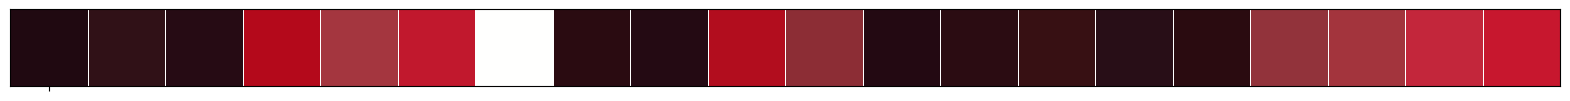

In [11]:
nb_couleurs = 20

im_palette_naive = palette_naive(im_dict_couleurs,nb_couleurs)
plot_color_palette(im_palette_naive)

## Étape 3
### 3.0 : Énoncé 
Re-colorier une image avec une palette de $k$ couleurs, et afficher le résultat sous forme d'image PIL. Pour re-colorier chaque pixel, prendre la couleur la plus proche dans la palette en utilisant une fonction de distance (Euclidienne par exemple).

### 3.1 : Calcule de distance
- Pour recolorier une image, nous avons dans un premier temps besoin d'une fonction de calcul de distance entre 2 couleurs. Nous avons donc implmenté la fonction dist_eu qui calcule la distance euclidienne entre 2 couleurs.
>**Formule de la Distance Euclidienne :**
>La distance euclidienne entre deux couleurs $c_1$ et $c_2$, représentées chacune par un triplet RGB est calculée comme suit :
>$$
>d(c_1, c_2) = \sqrt{(R_2 - R_1)^2 + (G_2 - G_1)^2 + (B_2 - B_1)^2}
>$$
>où $R_1, G_1, B_1$ sont les composantes Rouge, Vert et Bleu de la couleur $c_1$, et $R_2, G_2, B_2$ sont celles de la couleur $c_2$. Chaque composant est une valeur comprise entre 0 et 255.


In [12]:
def dist_eu(c1,c2) :
    return (sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2 + (c1[2] - c2[2])**2))

In [13]:
assert dist_eu((255, 0, 0), (255, 0, 0)) == 0 #La distance entre 2 couleurs identique est nulle
assert dist_eu((162, 172, 14), (83, 67, 194)) == dist_eu((83, 67, 194),(162, 172, 14)) #La distance entre c1 et c2 est égale à la distance entre c2 et c1
assert dist_eu((0, 0, 0), (255, 0, 0)) == 255 #Calcule de distance simple

### 3.2 : Recoloriage d'une image avec une palette
Pour le recolorier une image en utilisant uniquement les couleurs d'une palette, la fonction **recolorier_eucl** créé une copie de l'image fournie en argument afin de ne pas la modifier, on parcour ensuite chaque pixel de cette image et on change sa couleur par la plus proche couleur de la palette fournie en argument (*on considère ici la distance euclidienne*).

In [14]:
def recolorier_eucl(im , palette):
    im_2 = im.copy() #On créé une copie de l'image afin de ne pas la modifier
    px_2 = im_2.load()
    w , h = im_2.size
    k = len(palette)
    for i in range (w) :
        for j in range (h) : #On parcours chaque pixel de l'image
            c = px_2[i,j] #On recupere sa couleur
            min = dist_eu(c , palette[0])
            l_min = 0
            for l in range (k) : #On parcour la palette afin de trouver la couleur la plus proche de celle pixel en question
                if dist_eu(px_2[i,j] , palette[l]) < min :
                    min = dist_eu(c , palette[l])
                    l_min = l
            px_2[i,j] = palette[l_min] #On change la couleur du pixel pour lui donner la couleur de la palette la plus proche de sa couleur initiale
    return(im_2)

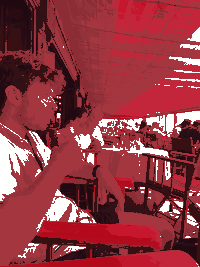

In [15]:
im_recolorier_pal_naive = recolorier_eucl(im, im_palette_naive)

display(im_recolorier_pal_naive)

## Etape 4
### 4.0 : Énoncé 
Proposer une méthode de validation de votre approche. Par exemple afficher la différence entre l'image originale et celle re-coloriée. Calculer un score global d'erreur.

### 4.1 : Calcul d'erreur
- Pour valider notre approche nous avons implémenté la fonction **compare_images** qui prend 2 images en entrée (ici l'originale et la recoloriée) et qui calcule la valeur moyenne des distances entre les pixels de même position. On a ainsi une façon de calculer un score d'erreur ce qui nous permettra de mettre en évidence ou non l'efficacité de nos méthodes.

In [16]:
def compare_images(original, recolored):
    original_rgb = original.convert('RGB')
    recolored_rgb = recolored.convert('RGB')# Convertir les deux images en format RGB pour assurer la compatibilité (utile lors de la transformation avec PIL)
    w,h = original_rgb.size
    if  (w,h)!= recolored.size:
        print('Les deux images n\'ont pas la même dimension')
        raise ValueError
    px_1 = original_rgb.load()
    px_2 = recolored_rgb.load()
    sum_error = 0
    for i in range (w) :
        for j in range (h) : #On parcours chaque pixel de l'image
            sum_error += dist_eu(px_1[i,j] , px_2[i,j])
    return sum_error/(w*h)

In [17]:
erreur_palette_naive = compare_images(im,im_recolorier_pal_naive)

print(f"Erreur avec la méthode naïve: {erreur_palette_naive}")

Erreur avec la méthode naïve: 48.87367335469312


## Étape 5
### 5.0 : Énoncé
Améliorer le choix des $k$ couleurs afin de minimiser l'erreur entre l'image originale et re-coloriée. Une piste possible est de trier les couleurs dans une liste, diviser cette liste en $k$ intervals de couleurs et prendre la couleur du milieu de chaque interval. D'autres méthodes plus avancées peuvent être explorées !

### 5.1 : Méthode des Kmeans
- Pour créer une palette de couleurs d'une image on a utilisé la **méthode des Kmeans**. Le principe de fonctionnement est le suivant : 
    1. On choisir $k$ pixels au hasard qui seront des *"centroïdes"*
    2. On crée $k$ groupes associés à ces centroïdes 
    3. Pour chaque pixel de l'image, on cherche le centroïde le plus proche (en couleur pour la norme euclidienne) et on l'ajoute dans le groupe associé à ce centroïde.
    4. On prend la moyenne des couleurs de chaque groupe, ce qui défini des nouveaux centroïdes
    5. On répète l'opération jusqu'à ce qu'il n'y ait plus de variation de ces centroïdes. 
    
    On défini le critère ***"plus de variations"*** en disant que si les nouveaux centroïdes sont égaux aux anciens alors il n'y a plus de variations et la boucle s'arrête.

In [18]:
def palette_kmeans(dict_couleurs , k):
    keys = list(dict_couleurs.keys())
    centroids = [keys[i] for i in random.sample(range(len(keys)), k)]
    variation = True

    while variation:
        centroids2 = []
        cluster = [[] for _ in range(k)]
    #On compare la distance de la couleur "key" a chaque centroid
        for key in keys :

#Indice du centroid duquel la couleur qu'on considere est le plus proche
 
            i_min = 0
            for i in range (k) :
                if dist_eu(centroids[i_min],key) > dist_eu(centroids[i],key):
                    i_min = i           
            cluster[i_min].append(key)

#Calcul de la moyenne de la couleur de chaque groupe (à la main)

        for i in range (k):
            n_i = len(cluster[i])
            S_r = 0
            S_v = 0
            S_b = 0
            for j in range (n_i):
                S_r += cluster[i][j][0]
                S_v += cluster[i][j][1]
                S_b += cluster[i][j][2]
            moy_r = S_r//n_i
            moy_v = S_v//n_i
            moy_b = S_b//n_i
            centroids2.append((moy_r , moy_v , moy_b))

        
#Si les nouveaux centroides sont egaux aux anciens, alors il n'y a plus de variation

        if set(centroids2) == set(centroids) :
            variation = False
        else :
            centroids = centroids2
    
    return centroids

In [19]:
nb_couleurs = 20

im_palette_kmeans = palette_kmeans(im_dict_couleurs,nb_couleurs)

Erreur avec la méthode des Kmean: 17.710319130655176


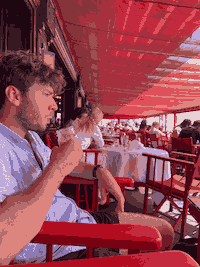

In [20]:
im_recolorier_pal_kmean= recolorier_eucl(im, im_palette_kmeans)
erreur_palette_kmean = compare_images(im,im_recolorier_pal_kmean)

print(f"Erreur avec la méthode des Kmean: {erreur_palette_kmean}")
display(im_recolorier_pal_kmean)

On peut comparer cette méthode à la ***méthode naïve*** et on remarque que la ***méthode des Kmeans*** produit un résultat bien plus fidèle à la réalité que celui de la méthode naïve pour des palettes de même tailles

Erreur avec la méthode naïve: 35.2628846881629


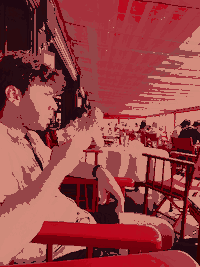

Erreur avec la méthode de K-mean: 18.100778137714173


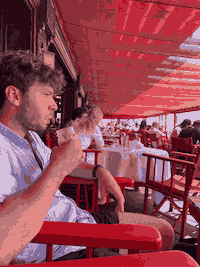

In [39]:
nb_couleurs = 20

im_palette_naive = palette_naive(im_dict_couleurs,nb_couleurs)
im_palette_kmeans = palette_kmeans(im_dict_couleurs, nb_couleurs)

afficher_palette = False

if afficher_palette:  
    plot_color_palette(im_palette_naive)
    plot_color_palette(im_palette_kmeans)

im_recolorier_pal_naive= recolorier_eucl(im, im_palette_naive)
im_recolorier_pal_kmean= recolorier_eucl(im, im_palette_kmeans)

erreur_palette_naive = compare_images(im,im_recolorier_pal_naive)
erreur_palette_kmean = compare_images(im,im_recolorier_pal_kmean)

print(f"Erreur avec la méthode naïve: {erreur_palette_naive}")
display(im_recolorier_pal_naive)

print(f"Erreur avec la méthode de K-mean: {erreur_palette_kmean}")
display(im_recolorier_pal_kmean)

## Étape 6
### 6.0 : Énoncé
Tester sur plusieurs images de votre choix ou générées automatiquement avec un nombre et une distribution connue de couleurs. Comparer les performances de vos techniques avec d'autres méthodes (cette fois vous pouvez utiliser un éditeur de texte ou la fonction _quantize_ de PIL [(doc)](https://pillow.readthedocs.io/en/stable/reference/Image.html).

### 6.1 : Comparaison avec _quantize_
Tout d'abord on va utiliser la fonction ***quantize*** de la bibliotheque **PIL** pour quantifier les couleurs. Puis, grâce à notre fonction ***compare_image*** on va pouvoir attribuer un score d'erreur à la fonction de la bibliotheque **PIL** et comparer ce score avec celui de la ***méthode des Kmeans*** que nous avons implémentée.

On observe que le score d'erreur de la **méthode des K-Means** que nous avons implémentée est de et celui de la fonction **quantize** de la bibliothèque **PIL** sont sensiblement proches en comparaison avec la méthode naïve. De plus, visuellement les deux méthodes restent très proches. On peut donc en conclure qu'elles sont quasiment **équivalentes**.

In [22]:
#Quatification de couleur de PIL 
def pil_quantize_image(image, num_colors):
    quantized = image.quantize(colors=num_colors)
    return quantized

Image original : 


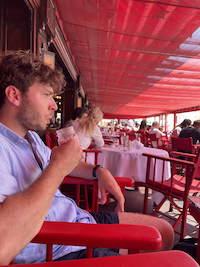

Image re-coloriée avec la méthode K-mean : 
Erreur avec la méthode K-mean: 17.82113921766119


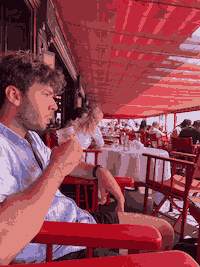

Image re-coloriée avec la méthode de PIL : 
Erreur avec la méthode PIL: 19.272809314034188


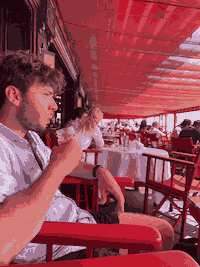

In [23]:
# Méthode des K-Means
nb_couleurs = 20
im_palette_kmeans = palette_kmeans(im_dict_couleurs, nb_couleurs)

# Methode de quantification de couleur de PIL
im_recolorier_pal_kmean= recolorier_eucl(im, im_palette_kmeans)
im_recolorier_pil = pil_quantize_image(im, nb_couleurs)

# Comparer les images
erreur_palette_kmean = compare_images(im, im_recolorier_pal_kmean)
erreur_pil = compare_images(im, im_recolorier_pil)


print("Image original : ")
display(im)
print("Image re-coloriée avec la méthode K-mean : ")
print(f"Erreur avec la méthode K-mean: {erreur_palette_kmean}")
display(im_recolorier_pal_kmean)
print("Image re-coloriée avec la méthode de PIL : ")
print(f"Erreur avec la méthode PIL: {erreur_pil}")
display(im_recolorier_pil)

## Étape 7
### 7.0 : Énoncé
Utiliser un pré-traitement des images (flou gaussien, etc) afin de lisser les couleurs est une piste afin de choisir de meilleurs couleurs représentatives. Proposez une quantification de cette amélioration (ou de déterioration éventuelle).

### 7.1 : Images en niveau de gris
Les operations etant coupteuses, nous passons en niveau de gris à l'aide de la fonction ***conversion_gris*** que nous avons déjà implementé dans le TD4

In [24]:
def conversion_gris(px, w, h):
    for x in range(0, w):
        for y in range(0, h):
            m = int(0.30*px[x, y][0] + 0.59*px[x, y][1] + 0.11*px[x, y][2])
            px[x, y] = (m, m, m)

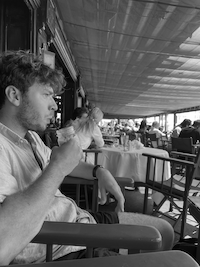

In [25]:
im_gris = im.copy()
px_gris = im_gris.load()
conversion_gris(px_gris,w,h)

im_dict_couleurs_gris = dict_couleur(px_gris, w, h)
display(im_gris)

#### 7.1.1 : Somme et Convolution de matrices
Le pré-traitement d'image avec le **flou gaussien** nécessite de faire des opérations sur les matrices, c'est pourquoi nous avons besoin de la fonction ***somme_matrice*** et ***convolution_gris***. 



In [26]:
def somme_matrice(m: list = []):
    s = 0
    for row in m:
        s += sum(row)
    return s

def convolution_gris(px, W: int, H: int, m: list):
    
    w = len(m)
    h = len(m[0])
    wp = int((w - 1) / 2)
    hp = int((h - 1) / 2)

    for x in range(wp, W - wp):
        for y in range(hp, H - hp):
            sum = 0
            for a in range(-wp, wp + 1):
                for b in range(-hp, hp + 1):
                    sum += px[x + a, y + b][0] * m[a + wp][b + hp]
            v = int(sum / somme_matrice(m))
            px[x, y] = v, v, v

### 7.1.2 : Méthode des Kmeans avec flou gaussien en niveau de gris
Nous avons maintenant tout les outils pour pouvoir implementer une fonction qui renvoit une palette de couleur en utilisant le flou gaussien

In [27]:
def palette_kmeans_gauss_gris(im,k,g=3):
    im_gauss = im.copy()
    w , h = im.size
    px_gauss = im_gauss.load()
    conversion_gris(px_gauss,w,h)
    if g == 3:
        mat = [[1,2,1],[2,4,2],[1,2,1]]
    elif g == 7:
        mat = [[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]]
    convolution_gris(px_gauss,w,h,mat)
    return(palette_kmeans(dict_couleur(px_gauss,w,h),k))


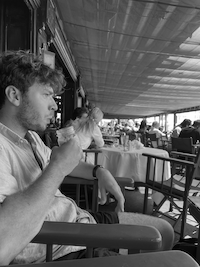

Erreur avec gauss: 24.917367249747425


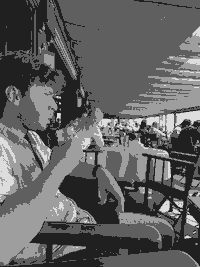

Erreur sans gauss: 25.085609713021896


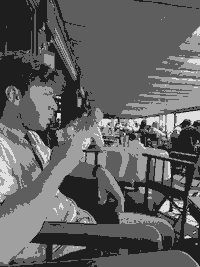

In [28]:
nb_couleurs = 4

im_palette_kmeans_gauss = palette_kmeans_gauss_gris(im_gris,nb_couleurs)
im_palette_kmeans = palette_kmeans(im_dict_couleurs_gris,nb_couleurs)

im_recolorier_gauss = recolorier_eucl(im_gris, im_palette_kmeans_gauss)
im_recolorier = recolorier_eucl(im_gris, im_palette_kmeans)


error_g = compare_images(im_gris, im_recolorier_gauss)
error_sans_g = compare_images(im_gris, im_recolorier)

display(im_gris)
print(f"Erreur avec gauss: {error_g}")
display(im_recolorier_gauss)
print(f"Erreur sans gauss: {error_sans_g}")
display(im_recolorier)

### 7.2 : Images en couleur
Nous allons maintenant essayer de réaliser les mêmes fonctions tout en conservant les couleurs
#### 7.2.1 : Convolution de matrice en RGB
Pour la fonction de convolution, il suffit de faire la moyenne sur chacune des 3 couleurs du pixel

In [29]:
def convolution_rgb(px, W: int, H: int, m: list):
    
    w = len(m)
    h = len(m[0])
    wp = int((w - 1) / 2)
    hp = int((h - 1) / 2)

    for x in range(wp, W - wp):
        for y in range(hp, H - hp):
            sumr = 0
            sumg = 0
            sumb = 0
            for a in range(-wp, wp + 1):
                for b in range(-hp, hp + 1):
                    sumr += px[x + a, y + b][0] * m[a + wp][b + hp]
                    sumg += px[x + a, y + b][1] * m[a + wp][b + hp]
                    sumb += px[x + a, y + b][2] * m[a + wp][b + hp]
            r = int(sumr / somme_matrice(m))
            g = int(sumg / somme_matrice(m))
            b = int(sumb / somme_matrice(m))
            px[x, y] = r, g, b

### 7.2.2 : Méthode des Kmeans avec flou gaussien en couleur
Nous avons maintenant tout les outils pour pouvoir implementer une nouvelle fonction qui renvoit une palette de couleur en utilisant le flou gaussien en conservant les couleurs.

In [30]:
def palette_kmeans_gauss(im,k,g=3):
    im_gauss = im.copy()
    w , h = im.size
    px_gauss = im_gauss.load()
    if g == 3:
        mat = [[1,2,1],[2,4,2],[1,2,1]]
    elif g == 7:
        mat = [[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]]
    convolution_rgb(px_gauss,w,h,mat)
    return(palette_kmeans(dict_couleur(px_gauss,w,h),k))

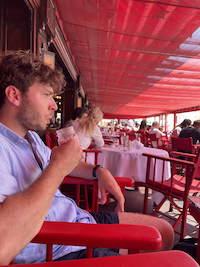

Erreur avec gauss: 25.82886213588133


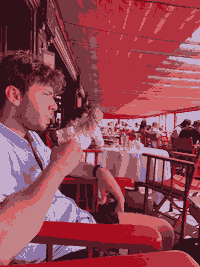

Erreur sans gauss: 24.950732902489985


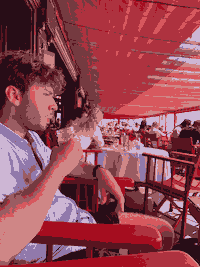

In [31]:
nb_couleurs = 10

im_palette_kmeans_gauss = palette_kmeans_gauss(im.copy(),nb_couleurs,7)
im_palette_kmeans = palette_kmeans(im_dict_couleurs,nb_couleurs)

im_recolorier_gauss = recolorier_eucl(im, im_palette_kmeans_gauss)
im_recolorier = recolorier_eucl(im, im_palette_kmeans)


error_g = compare_images(im, im_recolorier_gauss)
error_sans_g = compare_images(im, im_recolorier)

display(im)
print(f"Erreur avec gauss: {error_g}")
display(im_recolorier_gauss)
print(f"Erreur sans gauss: {error_sans_g}")
display(im_recolorier)

## Etape 8
### 8.0 : Énoncé
Proposer une méthode d'amélioration de calcul de la distance entre deux couleurs, vous pouvez vous baser sur d'autres espaces de couleur [(doc)](https://fr.wikipedia.org/wiki/Espace_de_couleur). Cette partie est difficile, les espaces de couleurs possibles sont complexes à comprendre.

### 8.1 : Espace ....
Nous avons cazmjc ejc lazkjnec lazjkenc lajkzec z

## Etape 9
### 9.0 : Énoncé
Optimiser les étapes précédentes (complexité, espace nécessaire, structures de données, etc.).

### 9.1 : Fonction palette_naive_optimisée
Nous avons optimisé la fonction de palette_naive afin de ne plus parcourir k fois le dictionnaire, mais de le parcourir une seul fois en actualisant pour chaque couleur du dictionnaire, la liste de k couleurs les plus presentes.

In [32]:
def palette_naive_optimisee(dict_couleurs, k):
    n_couleur = len(dict_couleurs)
    if k > n_couleur:
        k = n_couleur
        print(f'Attention : le dictionnaire contient seulement {n_couleur}')
        return dict_couleurs.keys()

    palette = []

    for couleur, frequence in dict_couleurs.items():
        if len(palette) < k:
            palette.append((frequence, couleur))
        else:
            # Trouver la couleur avec la fréquence la plus faible dans la palette
            min_freq = min(palette, key=lambda x: x[0])
            if frequence > min_freq[0]:
                # Remplacer la couleur avec la fréquence la plus faible
                palette[palette.index(min_freq)] = (frequence, couleur)

    # Extraire les couleurs de la palette
    return [couleur for _, couleur in palette]


### 9.2 : Fonction palette_kmeans_opti

Concernant la ***palette_kmeans*** en terme d'optimisation nous n'avons  pas agir sur le nombre d'iteration de la boucle, mais nous avons optimiser l'espace utilisé et la rapidité des calculs en remplaçant les listes de taille fixe par des **tableaux**. 

Pour stocker les centroïdes et les groupes associés aux centroïdes nous pouvons prédéfinir des tableaux de taille $k$ car le nombre de centroïdes et le groupe qui lui est associé restent fixes. 

De même, lors du calcul de la moyenne des couleur dans un groupe permettant de définir les nouveaux centroïdes, on peut définir un tableau de 1 ligne et 3 colonnes pour optimiser l'espace memoire et les calculs.

In [33]:
def palette_kmeans_opti(colors , k):
    keys = list(colors.keys())
    centroids = [keys[i] for i in random.sample(range(len(keys)), k)]
    variation = True

    while variation:
        centroids2 = np.array([[] for _ in range(k)] , dtype = list) #On defini un tableau de k listes vides
        cluster = np.array([[] for _ in range(k)] , dtype = list) #On defini un tableau de k listes vides
        for key in keys : 
            i_min = 0
            for i in range (k) :
                if dist_eu(centroids[i_min],key) > dist_eu(centroids[i],key):
                    i_min = i           
            cluster[i_min].append(key)
        for i in range (k):
            n_i = len(cluster[i])
            S = np.zeros(1,3)
            for j in range (n_i):
                S[0] += cluster[i][j][0]
                S[1] += cluster[i][j][1]
                S[2] += cluster[i][j][2]
            moy  = np.zeros(1,3)
            moy = moy//n_i
            centroids2[i] = [(moy[0] , moy[1] , moy[2])]
        if set(centroids2) == set(centroids) :
            variation = False
        else :
            centroids = centroids2
    
    return centroids

## Etape 10
### 10.0 : Énoncé
Créer une palette représentative à partir de plusieurs images.

### 10.1 : Palette de plusieur images
Pour obtenir une palette representative de plusieurs images, nous allons dans un premier temps implementer une fonction qui prend en argument une liste de chemin et qui renvoit un dictionnaire comportant l'ensemble des couleurs des images

In [34]:
def dict_couleur_list(list_chemins):
    dict_c = {}
    for chemin in list_chemins:
        im = Image.open(str(chemin))
        im = im.convert("RGB")  
        px = im.load()
        w , h = im.size
        for x in range (w) : 
            for y in range (h) : #On parcourt tout les pixels de la photo
                if px[x,y] in  dict_c: #On test si la couleur du pixel est deja presente dans le dictionnaire
                    dict_c[px[x,y]] += 1 #Si oui, on incremente de 1 la valeur de sa frequence
                else :
                    dict_c[px[x,y]] = 1  #Si la couleur n'etait pas presente, on l'ajoute dans le dictionnaire avec une frequence de 1
    return dict_c

In [35]:
list_chemins = ["IMG_3135.png","IMG_1964.png",'IMG_0742.jpg']

dict_couleur_123 = dict_couleur_list(list_chemins)

print (dict_couleur_123)

{(64, 58, 46): 163, (65, 59, 47): 99, (65, 59, 48): 10, (66, 60, 48): 38, (67, 61, 49): 16, (67, 61, 50): 6, (68, 62, 50): 1, (67, 60, 50): 105, (68, 61, 51): 44, (69, 62, 52): 1, (63, 58, 48): 9, (62, 58, 47): 38, (63, 59, 48): 19, (62, 57, 46): 2, (59, 55, 45): 7, (57, 53, 44): 3, (54, 50, 41): 15, (54, 49, 41): 1, (58, 54, 53): 2, (54, 52, 56): 3, (60, 58, 64): 3, (58, 56, 61): 12, (53, 50, 57): 8, (59, 56, 63): 28, (61, 58, 65): 14, (51, 48, 55): 7, (69, 66, 73): 6, (74, 71, 78): 1, (62, 59, 66): 14, (52, 49, 56): 4, (58, 55, 62): 28, (55, 52, 59): 11, (56, 54, 60): 2, (57, 54, 61): 24, (61, 58, 66): 5, (64, 61, 70): 24, (62, 59, 68): 25, (60, 57, 66): 25, (63, 60, 69): 29, (49, 46, 57): 1, (104, 102, 107): 2, (114, 113, 117): 1, (63, 61, 67): 2, (64, 61, 69): 6, (67, 64, 74): 7, (78, 75, 83): 2, (111, 108, 114): 3, (116, 114, 119): 2, (100, 98, 102): 3, (66, 62, 72): 2, (102, 100, 106): 5, (125, 123, 128): 4, (118, 116, 120): 1, (122, 120, 124): 2, (133, 131, 136): 2, (65, 61, 72)

In [36]:
nb_couleurs = 20

palette_kmeans_123 = palette_kmeans(dict_couleur_123,nb_couleurs)

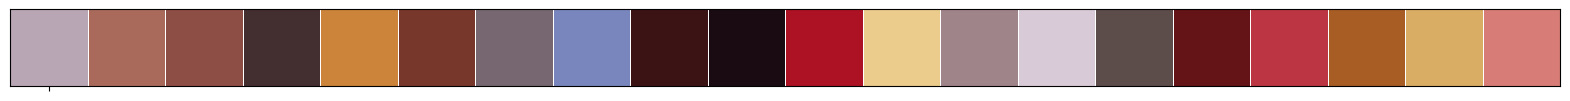

In [37]:
plot_color_palette(palette_kmeans_123)

Erreur avec la méthode des Kmean sur la palette globale: 20.833617288459582


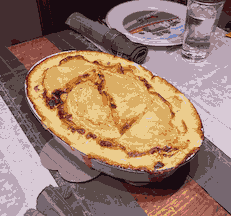

Erreur avec la méthode des Kmean sur la palette globale: 23.50180793248704


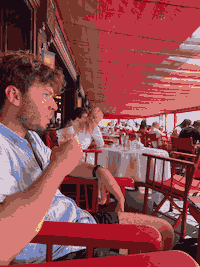

Erreur avec la méthode des Kmean sur la palette globale: 21.063368720846686


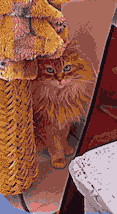

In [38]:
for chemin in list_chemins:
    image = Image.open(str(chemin))
    image = image.convert("RGB")  
    im_recolorier_pal_kmean_123= recolorier_eucl(image, palette_kmeans_123)
    erreur_palette_kmean_123 = compare_images(image,im_recolorier_pal_kmean_123)
    print(f"Erreur avec la méthode des Kmean sur la palette globale: {erreur_palette_kmean_123}")
    display(im_recolorier_pal_kmean_123)